In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras import Input
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.layers import Dense, Flatten
import tensorflow as tf


dataset----https://www.kaggle.com/pratik2901/multiclass-weather-dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [ ]:
!ls

Untitled0.ipynb  weather_classifier.ipynb


In [ ]:
!unzip -q "/content/drive/My Drive/Colab Notebooks/archive.zip"

In [ ]:
!ls

 drive	'Multi-class Weather Dataset'   sample_data


In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)
 
train_data = train_datagen.flow_from_directory('Multi-class Weather Dataset',
                                               target_size=(250 , 250),
                                               batch_size= 32,
                                               class_mode='categorical',
                                                subset='training')
 
test_data = train_datagen.flow_from_directory('Multi-class Weather Dataset',
                                               target_size=(250 , 250),
                                               batch_size= 32,
                                               class_mode='categorical',
                                                subset='validation')

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [ ]:
num_classes = 4

# defining model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), input_shape = (250 , 250 , 3), activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Conv2D(64, (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D((3,3)),
    tf.keras.layers.Conv2D(128 , (5,5) , activation = 'relu'),
    tf.keras.layers.MaxPool2D(3,3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5, seed = 5),
    tf.keras.layers.Dense(128 , activation = 'relu'),
    tf.keras.layers.Dense(num_classes , activation = 'softmax')])


In [ ]:
# getting model summary after compiling
model.compile(loss = 'categorical_crossentropy' , optimizer = tf.keras.optimizers.Adam(lr = 0.001) , metrics = 'accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 246, 246, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 82, 82, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 78, 78, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [ ]:
# training model
history = model.fit(train_data ,
          validation_data = test_data ,
          epochs = 5 ,
          steps_per_epoch = 901/32, # train_files/batch_size
          validation_steps = 224/32, # valid_files/batch_size
          ) 

Epoch 1/5
28/28 [==============================] - 34s 884ms/step - loss: 1.0811 - accuracy: 0.4961 - val_loss: 0.7451 - val_accuracy: 0.7634
Epoch 2/5
28/28 [==============================] - 22s 775ms/step - loss: 0.6669 - accuracy: 0.7248 - val_loss: 0.8719 - val_accuracy: 0.6071
Epoch 3/5
28/28 [==============================] - 22s 790ms/step - loss: 0.6807 - accuracy: 0.7003 - val_loss: 0.5671 - val_accuracy: 0.7812
Epoch 4/5
28/28 [==============================] - 22s 777ms/step - loss: 0.5712 - accuracy: 0.7703 - val_loss: 0.5882 - val_accuracy: 0.7321
Epoch 5/5
28/28 [==============================] - 22s 777ms/step - loss: 0.5164 - accuracy: 0.7913 - val_loss: 0.5135 - val_accuracy: 0.8036


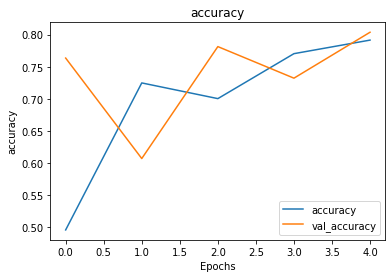

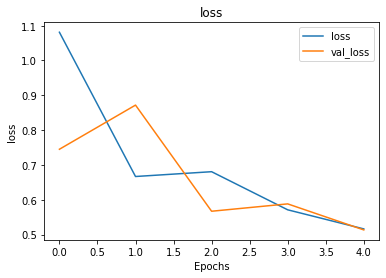

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.title(string)
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
from keras.preprocessing.image import image

def prediction(test_path):
    img = image.load_img(test_path , target_size = (250 , 250))
    img = image.img_to_array(img, dtype=np.uint8)
    img = np.array(img)/255.0
        
    plt.title('Image')
    plt.axis('off')
    plt.imshow(img.squeeze())
        
    predict = model.predict(img[np.newaxis , ...])
    predicted_class = labels[np.argmax(predict[0] , axis = -1)]
        
    print('Prediction Value: ' , np.max(predict[0] , axis = -1))
    print("Classified:",predicted_class)

In [ ]:
# Generated Labels
labels = {0: 'Cloudy', 1: 'Rain', 2: 'Shine', 3: 'Sunrise'}
labels

{0: 'Cloudy', 1: 'Rain', 2: 'Shine', 3: 'Sunrise'}

Prediction Value:  0.65930325
Classified: Rain


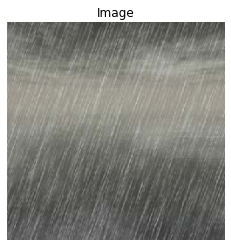

In [ ]:
test_path = './Multi-class Weather Dataset/Rain/rain1.jpg'
prediction(test_path)

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Cloudy_weather.jpg/800px-Cloudy_weather.jpg -O "demo.jpg"

--2021-12-21 11:12:00--  https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Cloudy_weather.jpg/800px-Cloudy_weather.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37113 (36K) [image/jpeg]
Saving to: ‘demo.jpg’

demo.jpg            100%[===================>]  36.24K  --.-KB/s    in 0.06s   

2021-12-21 11:12:01 (630 KB/s) - ‘demo.jpg’ saved [37113/37113]



In [ ]:
#load the image
my_image = load_img('demo.jpg', target_size=(250,250))

#preprocess the image
my_image = img_to_array(my_image)
my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
my_image = preprocess_input(my_image)
 
#make the prediction
prediction = model.predict(my_image)

In [ ]:
k=[np.round(x) for x in prediction] #hence,cloudy 
pos=k.index(max(k))
pos

0

In [ ]:
print("prediction:",labels[pos])

prediction: Cloudy


In [ ]:
model.save('my.h5')

In [ ]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 9.2 MB 4.1 MB/s 
     |████████████████████████████████| 180 kB 51.8 MB/s 
     |████████████████████████████████| 111 kB 51.3 MB/s 
     |████████████████████████████████| 4.3 MB 43.9 MB/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 
     |████████████████████████████████| 164 kB 55.3 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 126 kB 55.0 MB/s 
     |████████████████████████████████| 791 kB 38.0 MB/s 
     |████████████████████████████████| 374 kB 51.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.24 which is incompatible.
google-colab 1.0.0 requires ipykernel~=4.10, but you have ipykernel 6.6.0 which is incompatible.
google-colab 1.0.0 requires ipytho

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
import streamlit as st


@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Major Project AI/my.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # WEATHER CLASSIFICATION
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (250,250) 
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
        prediction = model.predict(img[np.newaxis,...])
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
  
    labels = {0: 'Cloudy', 1: 'Rain', 2: 'Shine', 3: 'Sunrise'}
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    predicted_class = labels[np.argmax(predictions[0] , axis = -1)]
    st.write(predicted_class )
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

Writing app.py


In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 22W98XoeXUiaK5qBLjv17MwYMDb_6ux7e6x6WArzbF7cP8qZo

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!nohup streamlit run app.py &

nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
url=ngrok.connect(port=8501)
url

'http://2a56-104-199-145-233.ngrok.io'